In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df= df.iloc[:,2:]

In [7]:
df.sample(5)

,Age,EstimatedSalary,Purchased
267,37,74000,0
1,35,20000,0
261,36,144000,1
111,37,71000,0
325,41,60000,0


In [8]:
from sklearn.model_selection import train_test_split    

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop('Purchased', axis=1),
    df['Purchased'],
    test_size=0.3,
    random_state=0
)
x_train.shape, x_test.shape

((280, 2), (120, 2))

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
type(x_train)

pandas.core.frame.DataFrame

In [13]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [15]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [16]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [19]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_train_scaled

,Age,EstimatedSalary
92,-1.163172,-1.584970
223,2.170181,0.930987
234,0.013305,1.220177
232,0.209385,1.075582
377,0.405465,-0.486047
...,...,...
323,0.993704,-1.151185
192,-0.869053,-0.775237
117,-0.182774,-0.514966
47,-1.065133,-0.457127


In [26]:
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test_scaled.columns, index=x_test.index)
x_test_scaled

,Age,EstimatedSalary
132,-0.771013,0.497201
309,0.013305,-0.572804
341,-0.280814,0.150172
196,-0.771013,0.265849
246,-0.280814,-0.572804
...,...,...
216,1.091743,-0.139018
259,0.699584,1.769639
49,-0.672973,0.555039
238,0.797624,0.352606


In [27]:
np.round(x_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [ ]:
np.round(x_test_scaled.describe(), 1)

,Age,EstimatedSalary
count,120.0,120.0
mean,-0.1,-0.0
std,1.1,1.0
min,-1.9,-1.6
25%,-1.0,-0.7
50%,-0.2,-0.2
75%,0.7,0.5
max,2.2,2.3


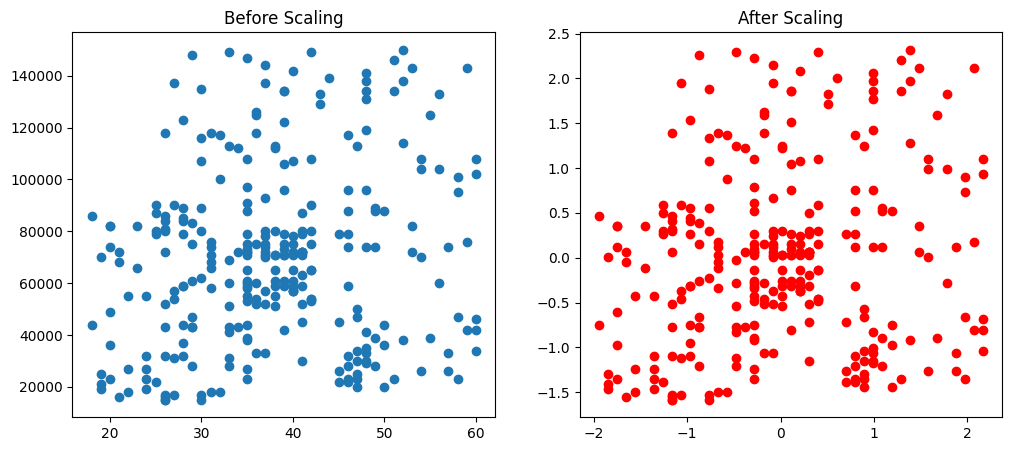

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')
plt.show()

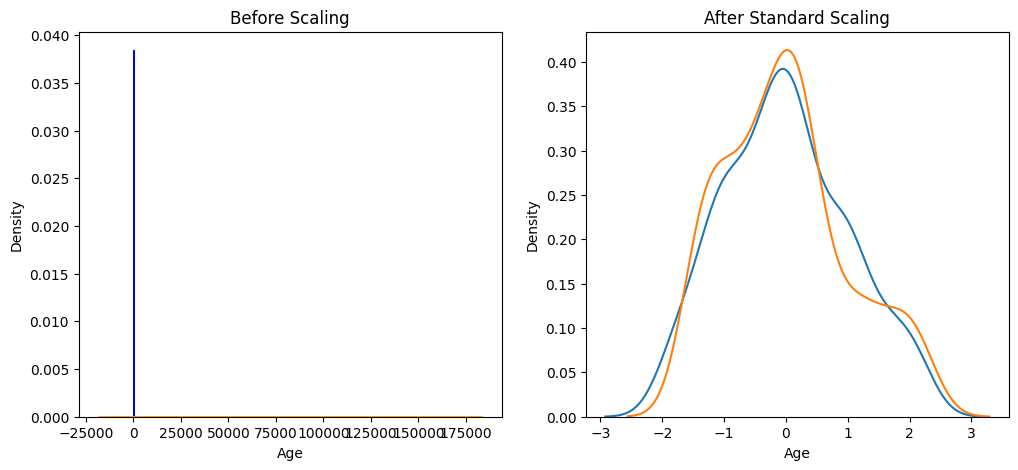

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
# Before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1, fill=True, color='blue', alpha=0.5)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1, fill=True, color='orange', alpha=0.5)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

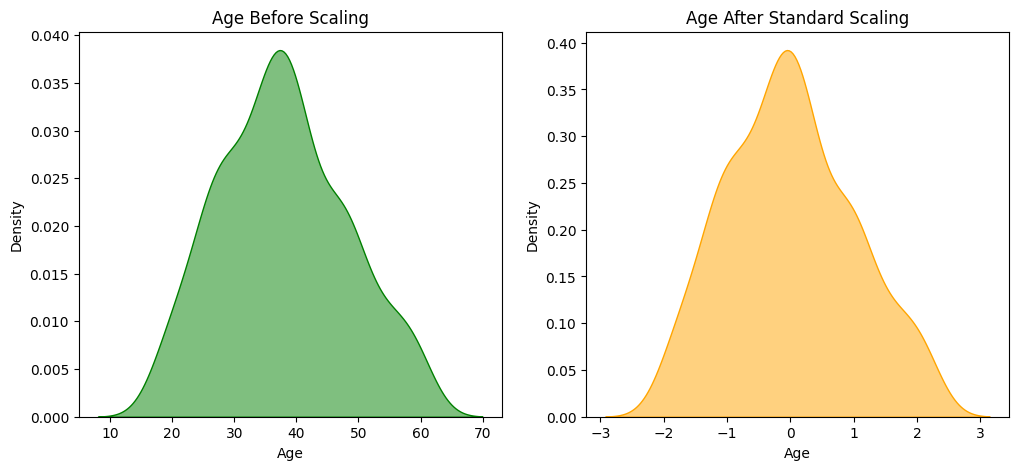

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,5))

#Age beforeScaling
ax1.set_title('Age Before Scaling') 
sns.kdeplot(x_train['Age'], ax=ax1, fill=True, color='green', alpha=0.5)

#Age afterScaling
ax2.set_title('Age After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2, fill=True, color='orange', alpha=0.5)
plt.show()

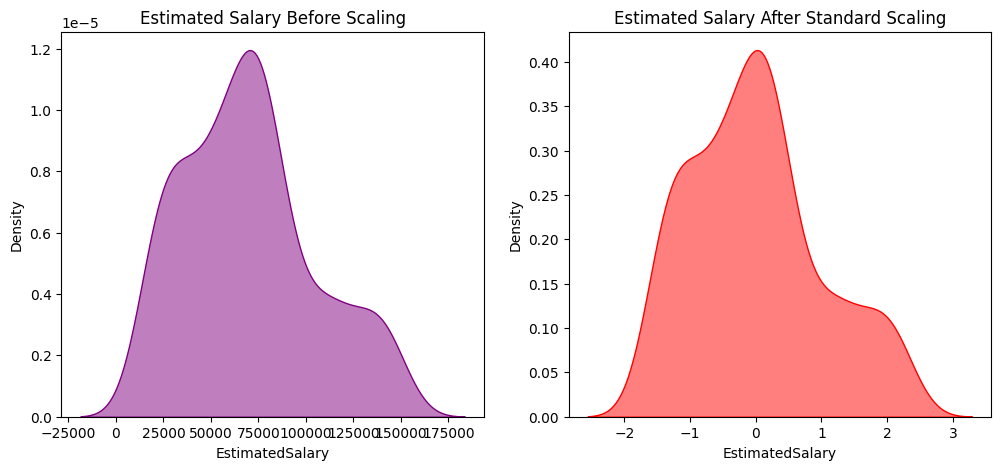

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,5))

#Age beforeScaling
ax1.set_title('Estimated Salary Before Scaling') 
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1, fill=True, color='purple', alpha=0.5)

#Age afterScaling
ax2.set_title('Estimated Salary After Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2, fill=True, color='red', alpha=0.5)
plt.show()

In [49]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [50]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [51]:
y_predict = lr.predict(x_test)
y_predict_scaled = lr_scaled.predict(x_test_scaled)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
print("Accuracy without Scaling:", accuracy_score(y_test, y_predict))
print("Accuracy with Scaling:", accuracy_score(y_test, y_predict_scaled))

Accuracy without Scaling: 0.875
Accuracy with Scaling: 0.8666666666666667
